# IA 340 Mini Project

**Primary Research Question**: How have average felony sentence lengths changed over time across major offense categories, and do sentencing patterns differ by state?

**Subquestions**:

Which offense categories receive the longest sentences on average?

Are there clear trends (increasing/decreasing) in average sentence length over time for violent vs non-violent felonies?

Are there outlier states that sentence significantly harder or softer?

**Author**: Elizabeth Crockett

**Dataset**: Felony_Sentences.csv 

**Date**: Monday October 13, 2025

# Data Documentation

**Source / URL & Provider**:  https://catalog.data.gov/dataset/?res_format=CSV&page=1 

 - Brief description: Felony sentencing records with columns such as (e.g.) state, year, offense_category, offense_description, sentence_months, sentence_years, sentence_type, disposition_date, etc. (adjust to actual columns).

**Time period covered**: 2000–2020

**Why Chosen?**: This dataset enables us to explore sentencing differences over time and across states, which is relevant to criminal justice policy and sentencing disparities.

# Imports:

In [1]:
%matplotlib inline


In [2]:
# Cell 1: Imports & config
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set(style="whitegrid")  # optional for nicer visuals
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
pd.set_option('display.max_columns', 200)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# Cell 2: Load dataset (try S3 first, then fallback to local path)
df = pd.read_csv('s3://ia-340-crockett-bucketone561/Felony_Sentences.csv')




/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:298: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


# Clean Data

In [4]:
# Cell 3: Basic profile
print("Shape:", df.shape)
print("\nInfo:")
display(df.info())
print("\nNumeric summary:")
display(df.describe(include='all').T)
print("\nMissing values (top 20):")
display(df.isnull().sum().sort_values(ascending=False).head(20))


Shape: (24676, 28)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24676 entries, 0 to 24675
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OBJECTID                   24676 non-null  int64  
 1   RID                        24676 non-null  int64  
 2   GENERIC_CASE_ID            24676 non-null  int64  
 3   GENERIC_OFFENDER_ID        24676 non-null  int64  
 4   CHARGE_NUMBER              24676 non-null  int64  
 5   SENTENCE_YEAR              24676 non-null  int64  
 6   RACE                       24676 non-null  object 
 7   GENDER                     24449 non-null  object 
 8   AGE_GROUP                  24580 non-null  object 
 9   OFFENSE                    24676 non-null  object 
 10  OFFENSE_TYPE               24676 non-null  object 
 11  HOMICIDE_TYPE              761 non-null    object 
 12  OFFENSE_SEVERITY_GROUP     24676 non-null  object 
 13  SENTENCE_TYPE       

None


Numeric summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OBJECTID,24676.0,NaN,NaN,NaN,12338.5,7123.491957,1.0,6169.75,12338.5,18507.25,24676.0
RID,24676.0,NaN,NaN,NaN,12338.5,7123.491957,1.0,6169.75,12338.5,18507.25,24676.0
GENERIC_CASE_ID,24676.0,NaN,NaN,NaN,4985361.82096,2895654.827356,1306.0,2448698.75,4971251.5,7472029.0,9999671.0
GENERIC_OFFENDER_ID,24676.0,NaN,NaN,NaN,5062825.407157,2872368.677243,1601.0,2602984.75,5111547.0,7530929.25,9999807.0
CHARGE_NUMBER,24676.0,NaN,NaN,NaN,2.667207,4.505582,1.0,1.0,1.0,2.0,166.0
SENTENCE_YEAR,24676.0,NaN,NaN,NaN,2014.114848,3.008751,2010.0,2011.0,2014.0,2017.0,2020.0
RACE,24676,7,Black,22487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,24449,2,M,22556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE_GROUP,24580,8,22-30,8478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OFFENSE,24676,231,Distribution Of a Controlled Substance,2963,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing values (top 20):


EDITED                       24676
EDITOR                       24676
CREATED                      24676
CREATOR                      24676
HOMICIDE_TYPE                23915
FINE_SUSPENDED_AMT            8377
RESTITUTION_AMT               8336
FINE_AMT                      8329
GENDER                         227
SENTENCE_SUSPENDED_MONTHS      120
SENTENCE_TO_SERVE_MONTHS       120
SENTENCE_IMPOSED_MONTHS        120
SENTENCE_PROBATION_MONTHS      120
AGE_GROUP                       96
OFFENSE_TYPE                     0
RACE                             0
CHARGE_NUMBER                    0
RID                              0
GENERIC_CASE_ID                  0
GENERIC_OFFENDER_ID              0
dtype: int64

In [5]:
# Cell 4: Normalize column names
df.columns = [c.strip() for c in df.columns]
print(df.columns.tolist())

# preview value counts for likely important columns (adjust column names to your file)
for col in ['state', 'offense_category', 'offense', 'sentence_months', 'sentence_years', 'year']:
    if col in df.columns:
        print(f"\nTop values for {col}:")
        display(df[col].value_counts().head(10))


['OBJECTID', 'RID', 'GENERIC_CASE_ID', 'GENERIC_OFFENDER_ID', 'CHARGE_NUMBER', 'SENTENCE_YEAR', 'RACE', 'GENDER', 'AGE_GROUP', 'OFFENSE', 'OFFENSE_TYPE', 'HOMICIDE_TYPE', 'OFFENSE_SEVERITY_GROUP', 'SENTENCE_TYPE', 'SENTENCE_IMPOSED_MONTHS', 'SENTENCE_SUSPENDED_MONTHS', 'SENTENCE_TO_SERVE_MONTHS', 'SENTENCE_PROBATION_MONTHS', 'VVCA_AMT', 'FINE_AMT', 'RESTITUTION_AMT', 'FINE_SUSPENDED_AMT', 'GIS_ID', 'GLOBALID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED']


In [6]:
# Step 5 — clean and inspect sentence length column
df['SENTENCE_TO_SERVE_MONTHS'] = pd.to_numeric(df['SENTENCE_TO_SERVE_MONTHS'], errors='coerce')

# quick check of distribution
display(df[['SENTENCE_TO_SERVE_MONTHS']].describe())


,SENTENCE_TO_SERVE_MONTHS
count,24556.000000
mean,29.858568
std,55.012991
min,0.000000
25%,1.000000
50%,12.000000
75%,34.000000
max,840.000000


***Data Cleaning Explanation:***

To understand the structure and quality of the dataset, I began by profiling it: checking its shape, data types, summary statistics, and missing values. This helped identify which columns needed cleaning or conversion. I then ensured that the SENTENCE_TO_SERVE_MONTHS column was numeric and inspected its distribution to confirm it was suitable for analysis. These steps were essential for preparing the data and ensuring accurate results in later stages.

# Process / Aggregate

In [7]:
# Step 6 — Average sentence length by race and offense type
avg_sentence = (
    df.groupby(['RACE', 'OFFENSE_TYPE'])['SENTENCE_TO_SERVE_MONTHS']
      .mean()
      .reset_index()
      .sort_values(by='SENTENCE_TO_SERVE_MONTHS', ascending=False)
)

display(avg_sentence.head(20))


,RACE,OFFENSE_TYPE,SENTENCE_TO_SERVE_MONTHS
33,White,Homicide,244.551724
6,Black,Homicide,228.676101
25,Other or Unknown,Homicide,209.431818
13,Hispanic,Homicide,84.000000
9,Black,Sex,80.444444
36,White,Sex,73.735714
16,Hispanic,Sex,55.083333
28,Other or Unknown,Sex,54.466667
29,Other or Unknown,Violent,39.548485
21,Native American,Sex,36.000000


In [8]:
print(df.columns.tolist())
df.head()


['OBJECTID', 'RID', 'GENERIC_CASE_ID', 'GENERIC_OFFENDER_ID', 'CHARGE_NUMBER', 'SENTENCE_YEAR', 'RACE', 'GENDER', 'AGE_GROUP', 'OFFENSE', 'OFFENSE_TYPE', 'HOMICIDE_TYPE', 'OFFENSE_SEVERITY_GROUP', 'SENTENCE_TYPE', 'SENTENCE_IMPOSED_MONTHS', 'SENTENCE_SUSPENDED_MONTHS', 'SENTENCE_TO_SERVE_MONTHS', 'SENTENCE_PROBATION_MONTHS', 'VVCA_AMT', 'FINE_AMT', 'RESTITUTION_AMT', 'FINE_SUSPENDED_AMT', 'GIS_ID', 'GLOBALID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED']


,OBJECTID,RID,GENERIC_CASE_ID,GENERIC_OFFENDER_ID,CHARGE_NUMBER,SENTENCE_YEAR,RACE,GENDER,AGE_GROUP,OFFENSE,OFFENSE_TYPE,HOMICIDE_TYPE,OFFENSE_SEVERITY_GROUP,SENTENCE_TYPE,SENTENCE_IMPOSED_MONTHS,SENTENCE_SUSPENDED_MONTHS,SENTENCE_TO_SERVE_MONTHS,SENTENCE_PROBATION_MONTHS,VVCA_AMT,FINE_AMT,RESTITUTION_AMT,FINE_SUSPENDED_AMT,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,1,39,7548270,7241253,3,2020,Black,M,22-30,Aggravated Assault Knowingly,Violent,NaN,M6,Incarceration,42.0,0.0,42.0,0.0,100,NaN,NaN,NaN,Felony_Sentences_1,{F8F4B0A9-C6CD-4D91-B878-DAFA4C9FF3CE},NaN,NaN,NaN,NaN
1,2,40,7548270,7241253,7,2020,Black,M,22-30,Unlawful Possession of a Firearm,Weapon,NaN,M8,Incarceration,24.0,0.0,24.0,0.0,100,NaN,NaN,NaN,Felony_Sentences_2,{2845886A-02B7-4D93-80DA-9468C5946DB8},NaN,NaN,NaN,NaN
2,3,41,2815732,5135695,3,2020,Black,M,22-30,Unlawful Possession of a Firearm (Crime of Vio...,Weapon,NaN,M6,Incarceration,36.0,0.0,36.0,0.0,100,0.0,0.0,0.0,Felony_Sentences_3,{4BF74DE0-05D1-4590-9F9E-07A77C54DA53},NaN,NaN,NaN,NaN
3,4,42,2815732,5135695,4,2020,Black,M,22-30,Unlawful Possession of a Firearm (Crime of Vio...,Weapon,NaN,M6,Incarceration,36.0,0.0,36.0,0.0,100,0.0,0.0,0.0,Felony_Sentences_4,{F7E0410A-8480-4B64-8760-59513962459A},NaN,NaN,NaN,NaN
4,5,43,7703087,7383706,1,2020,Black,F,61-70,Voluntary Manslaughter,Homicide,Voluntary Manslaughter,M4,Incarceration,1.0,0.0,1.0,0.0,100,0.0,0.0,0.0,Felony_Sentences_5,{F5E5096E-62D8-4162-BD74-C588790DD805},NaN,NaN,NaN,NaN


How this supports my research:


I calculated the average sentence length by race and offense type to identify which combinations receive the longest sentences. This helps highlight potential disparities and supports my research question by revealing how sentencing patterns vary across demographic and offense categories.

# Query

In [9]:
# Filter for violent offenses from 2010 onward
violent_recent = df[
    (df['OFFENSE_TYPE'] == 'Violent') &
    (df['SENTENCE_YEAR'] >= 2010)
]

# Group by year and calculate average sentence length
violent_trend = (
    violent_recent.groupby('SENTENCE_YEAR')['SENTENCE_TO_SERVE_MONTHS']
    .mean()
    .reset_index()
    .sort_values(by='SENTENCE_YEAR')
)

# Display the results in a DataFrame
display(violent_trend.head(10))



,SENTENCE_YEAR,SENTENCE_TO_SERVE_MONTHS
0,2010,40.821667
1,2011,41.620779
2,2012,43.298286
3,2013,34.400868
4,2014,37.882667
5,2015,29.697391
6,2016,31.427119
7,2017,33.963134
8,2018,31.126786
9,2019,30.100186


***Query Explanation:***

To explore how sentencing patterns have changed over time for violent offenses, I filtered the dataset to include only felony cases labeled as "Violent" in the OFFENSE_TYPE column from 2010 onward. I then grouped the data by year and calculated the average sentence length. Displaying the results in a DataFrame allows me to observe year-over-year changes and identify any trends in sentencing severity. This directly supports my research question by showing whether sentencing for violent offenses has increased, decreased, or remained stable over time.

# Visualizations

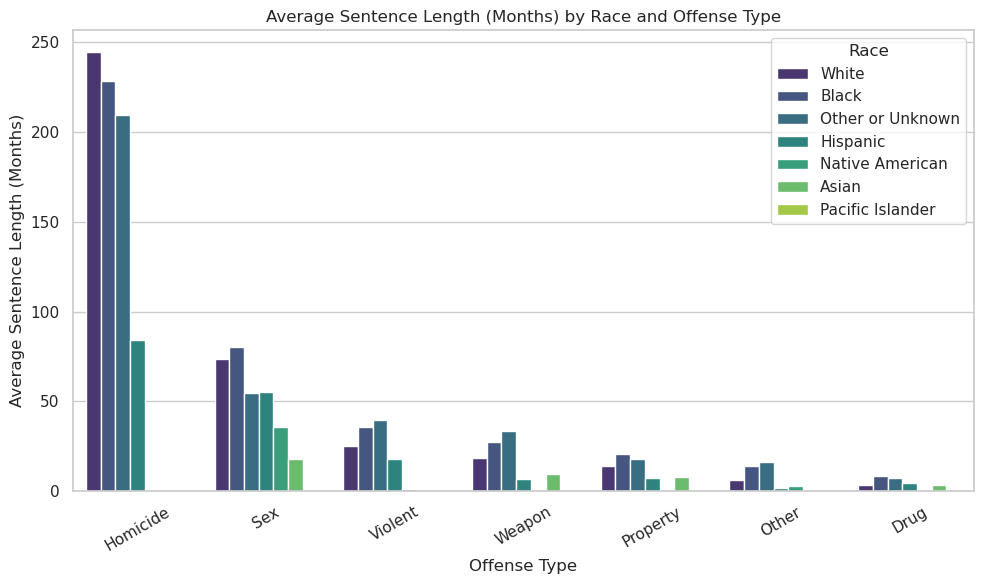

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

# Recreate avg_sentence if needed
avg_sentence = (
    df.groupby(['RACE', 'OFFENSE_TYPE'])['SENTENCE_TO_SERVE_MONTHS']
    .mean()
    .reset_index()
    .sort_values(by='SENTENCE_TO_SERVE_MONTHS', ascending=False)
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_sentence,
    x='OFFENSE_TYPE',
    y='SENTENCE_TO_SERVE_MONTHS',
    hue='RACE',
    palette='viridis'
)

plt.title('Average Sentence Length (Months) by Race and Offense Type')
plt.xlabel('Offense Type')
plt.ylabel('Average Sentence Length (Months)')
plt.legend(title='Race')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Visual Explanation:** 

The above visualization displays the differences of average sentence length by the type of offense (homicide, sex, violent, weapon, property, drug, or other) and by the race of the offender. The data shows a drastically higher average length for homicide crimes over all of the rest, with drug related crimes having the lowest on average sentece rates.

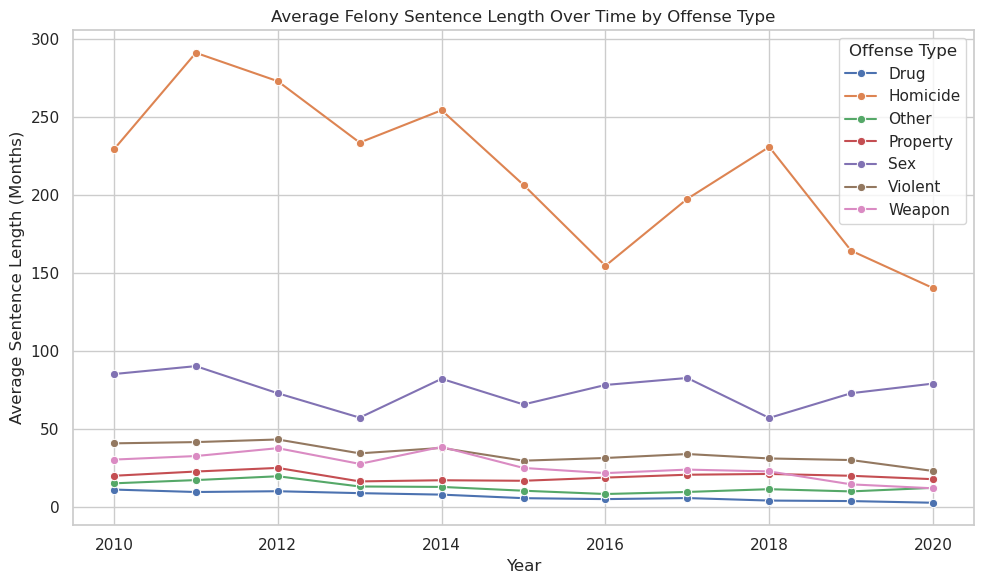

In [12]:

# Filter for recent years
recent = df[df['SENTENCE_YEAR'] >= 2010]

# Group by year and offense type
trend = (
    recent.groupby(['SENTENCE_YEAR', 'OFFENSE_TYPE'])['SENTENCE_TO_SERVE_MONTHS']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(
    data=trend,
    x='SENTENCE_YEAR',
    y='SENTENCE_TO_SERVE_MONTHS',
    hue='OFFENSE_TYPE',
    marker='o'
)

plt.title('Average Felony Sentence Length Over Time by Offense Type')
plt.xlabel('Year')
plt.ylabel('Average Sentence Length (Months)')
plt.legend(title='Offense Type')
plt.tight_layout()
plt.show()




***Visual Explanation:***

This line chart shows how average felony sentence lengths have changed from 2010 onward, comparing violent and non-violent offenses. It helps answer whether sentencing patterns are increasing, decreasing, or stable over time, and highlights any divergence between offense types. This supports the research question by revealing long-term shifts in sentencing severity across major categories.